In [1]:
import yfinance as yf
import pandas as pd
import os

In [2]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [4]:
sp500.index = pd.to_datetime(sp500.index)

In [5]:
sp500.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,0.0,0.0
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000,0.0,0.0
2024-03-26 00:00:00-04:00,5228.850098,5235.160156,5203.419922,5203.580078,3871790000,0.0,0.0
2024-03-27 00:00:00-04:00,5226.310059,5249.259766,5213.919922,5248.490234,3850500000,0.0,0.0
2024-03-28 00:00:00-04:00,5248.029785,5264.850098,5245.819824,5254.350098,3998270000,0.0,0.0


<Axes: xlabel='Date'>

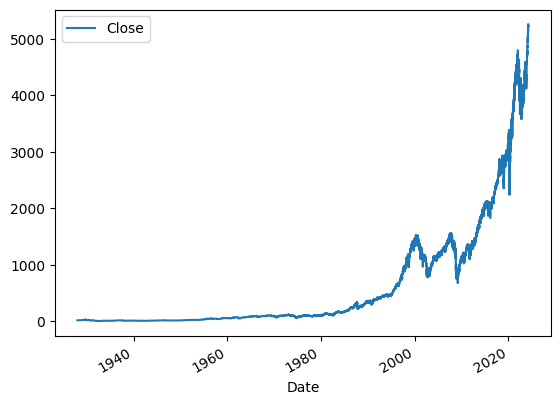

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [8]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [9]:
sp500 = sp500.loc["1990-01-01":].copy()

In [10]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,0.0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,0.0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,0.0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,0.0,349.619995,0
...,...,...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,0.0,0.0,5218.189941,0
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000,0.0,0.0,5203.580078,0
2024-03-26 00:00:00-04:00,5228.850098,5235.160156,5203.419922,5203.580078,3871790000,0.0,0.0,5248.490234,1


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

ModuleNotFoundError: No module named 'sklearn'